raccolta dati e analisi di essi

GDPR (gestione della privacy)

1.Creare un DataFrame da questo file json ed assegnarlo ad una variabile df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  #gestire le liste

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/MatPlotLib/Data/sample_chat_data.json')
df

,user_id,message_length,device_type,has_media,has_links,full_date
0,9a0f4@kp,43,android,False,False,2021-11-10T20:09:29.209Z
1,f6627@kp,0,android,False,False,2021-11-10T20:13:24.176Z
2,f6627@kp,38,android,False,False,2021-11-10T20:13:36.119Z
3,f6627@kp,33,android,False,False,2021-11-10T20:13:49.332Z
4,f9a56@kp,0,android,True,False,2021-11-10T20:17:00.923Z
...,...,...,...,...,...,...
213,f6627@kp,24,android,False,False,2021-11-16T07:09:05.402Z
214,9609a@kp,2,android,False,False,2021-11-16T07:09:33.219Z
215,f9a70@kp,37,ios,False,False,2021-11-16T19:46:42.982Z
216,f6627@kp,14,android,False,False,2021-11-16T19:58:27.852Z


In [ ]:
df.info()  #ci dice le colonne e il tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         218 non-null    object
 1   message_length  218 non-null    int64 
 2   device_type     218 non-null    object
 3   has_media       218 non-null    bool  
 4   has_links       218 non-null    bool  
 5   full_date       218 non-null    object
dtypes: bool(2), int64(1), object(3)
memory usage: 7.4+ KB


2.Creare un grafico a barre che mostri il numero di messaggi inviato da ogni utente in ordine decrescente, avente le seguenti caratterisiche:
I tick dell'asse delle ascisse siano inclinati di 45°
          ,Un titolo appropirato che descriva il grafico
          ,Impostare il colore royalBlue per colorare le barre
          ,Ingrandire le dimenrsioni del grafico e del testo del 50% (figsize default: [6.4, 4.8], font.size default: 10)

In [ ]:
msg_num = df.groupby('user_id',as_index=False).count().sort_values('full_date',ascending= False)
msg_num   #user id non è piu una colonna perche lo abbiamo raggruppato



,user_id,message_length,device_type,has_media,has_links,full_date
6,9a0f4@kp,57,57,57,57,57
1,9609a@kp,54,54,54,54,54
0,92a44@kp,20,20,20,20,20
2,96121@kp,17,17,17,17,17
13,f9a56@kp,17,17,17,17,17
9,f6627@kp,13,13,13,13,13
12,f9756@kp,9,9,9,9,9
10,f76a0@kp,5,5,5,5,5
11,f9742@kp,5,5,5,5,5
14,f9a70@kp,5,5,5,5,5


<BarContainer object of 15 artists>

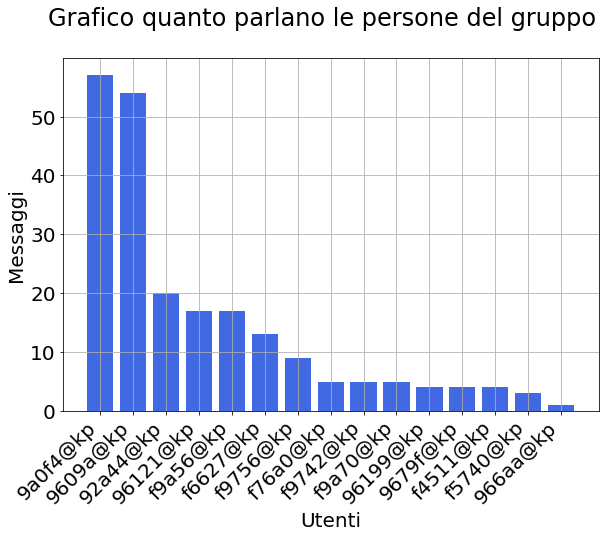

In [ ]:
plt.rcParams.update({'font.size':20}) #plt cambia (update) (dizionario) chiave e nuovo valore

fig = plt.figure(figsize=(9.6,7.2)) #crea la figura
ax = plt.axes()  #crea gli assi

fig.autofmt_xdate(rotation=45) #si ruotano le scritte della x di 45 gradi
fig.suptitle('Grafico quanto parlano le persone del gruppo')  # titolo grafico

ax.set_xlabel('Utenti') #inserisce un titolo per l'asse delle x
ax.set_ylabel('Messaggi')  #inserisce un titolo per l'asse delle y
ax.grid() #inseriscie una griglia

ax.bar(msg_num['user_id'],msg_num['full_date'],color = 'royalblue')  #creaimo il grafico a barre avente x che è la user_id e full_date come y e coloriamo le barre di blu

In [ ]:
#media
msg_num['full_date'].mean()   #la media dei messaggi inviati per ogni utente

14.533333333333333

In [ ]:
msg_num[msg_num['full_date'] > msg_num['full_date'].mean()]['user_id']  #gli utenti che hanno mandato piu messaggi della media

6     9a0f4@kp
1     9609a@kp
0     92a44@kp
2     96121@kp
13    f9a56@kp
Name: user_id, dtype: object

In [ ]:
msg_num[msg_num['full_date'] == msg_num['full_date'].max()]['user_id']  #l'utente che ha scritto piu di tutti

6    9a0f4@kp
Name: user_id, dtype: object

3.Creare un grafico a torta che riporti la media totale dei messaggi inviati suddivisi per giorni avente le seguenti caratteristiche:
L'angolo 0 deve partire da una inclinazione di 90°
Mettere in esposizione la fetta del grafico che assuneme il minor valore percentuale
Utilizzando come riferimento questo NoteBook scegliere 7 colori diversi per ogni giorno della settimana ed utilizzarli per colorare le fette del grafico

In [ ]:
df['full_date'] = pd.to_datetime(df['full_date'])
df['full_date'].dt.date               #viene aggiustata la data e diventa una data effettiva per pandas

0      2021-11-10
1      2021-11-10
2      2021-11-10
3      2021-11-10
4      2021-11-10
          ...    
213    2021-11-16
214    2021-11-16
215    2021-11-16
216    2021-11-16
217    2021-11-16
Name: full_date, Length: 218, dtype: object

In [ ]:
data = df.groupby(df['full_date'].dt.date).count()
data #raggruppa in base alla data e li conta


,user_id,message_length,device_type,has_media,has_links,full_date
full_date,,,,,,
2021-11-10,10,10,10,10,10,10
2021-11-11,34,34,34,34,34,34
2021-11-12,62,62,62,62,62,62
2021-11-13,2,2,2,2,2,2
2021-11-14,41,41,41,41,41,41
2021-11-15,56,56,56,56,56,56
2021-11-16,13,13,13,13,13,13


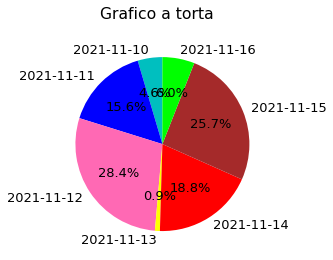

In [ ]:
plt.rcParams.update({'font.size':13}) 
cols = ['c','b','hotpink','yellow','red','brown','lime']     #lista di colori che verranno inseriti nel grafico

fig = plt.figure()
ax = plt.axes()
fig.suptitle('Grafico a torta')

ax.pie(data['user_id'],labels=data.index,autopct = '%1.1f%%',startangle=90,colors=cols)  #creiamo il grafico a torta e gli mettiamo per ogni spicchio la data (dato che abbiamo fatto groupby la data si trova negli indici)
plt.show()                                                                               # in %1.1f%% dopo il punto indica quanti n ci devono essere dopo la virgola
                                                                                        #startangle indica in quale angolo inizia la circonferenza

Creare un unico grafico a barre che riporti il numero totale dei messaggi inviati per ogni utente suddivisi in messaggi testuali, messaggi che contengo media e messaggi che contengono links, avente le seguenti caratteristiche:
Utilizare i colori #0097e6, #e1b12c e #44bd32 corrispettivamente per messaggi testuali, messaggi che contengo media e messaggi che contengono links
Inclinare i tick dell'asse delle ascisse di 45°
Un titolo appropirato che descriva il grafico
Aggiungere delle label appropiate ad ogni colonna e visualizzarle nella legenda, posizionarla a destra.
Impostare Unetnti come label dell'asse delle X
Impostare Numero di messaggi come label dell'asse delle Y

In [ ]:
import numpy as np

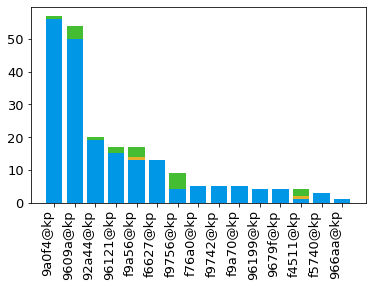

In [ ]:

data = df.groupby('user_id').agg({'message_length':'count','has_media':'sum','has_links':'sum'}).sort_values('message_length',ascending=False) #raggruppa gli user id 
labels = data.index #visto che abbiamo raggruppato gli user allora i nomi in data saranno uguali all'indice
msgs = np.subtract(data['message_length'],np.add(data['has_media'],data['has_links']))
msgs_links = data['has_links']
msgs_media = data['has_media']

fig = plt.figure()
ax = plt.axes()

fig.autofmt_xdate(rotation=90)


ax.bar(labels,msgs,color = '#0097e6')
ax.bar(labels,msgs_links,bottom=msgs,color = '#e1b12c') #indica quanto spazio dal basso deve lasciare
ax.bar(labels,msgs_media,bottom=msgs_links+msgs,color = '#44bd32')

plt.show()
